In [2]:
#!/usr/bin/env python
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import math
import random

# to make this notebook's output stable across runs
np.random.seed(100)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize']=12,10
import seaborn as sns

# Importing data from real_estate.csv

In [4]:
data = pd.read_csv("./sets/real_estate.csv",sep=',', encoding='utf-8')
data = data.drop(0).dropna()
print("Data contains: " + str(len(data)) + " records")
data = data.rename(columns={"X1 transaction date": "transaction_date", "X2 house age": "house_age", "X3 distance to the nearest MRT station": "distance_to_station", "X4 number of convenience stores": "no_stores", "X5 latitude": "latitude", "X6 longitude": "longitude", "Y house price of unit area": "price"})

y = data["price"].dropna()
X = data[["transaction_date", "house_age", "distance_to_station", "no_stores", "latitude", "longitude"]]

Data contains: 413 records


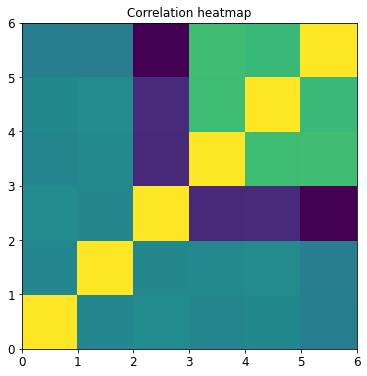

In [5]:
corr_matrix = np.corrcoef(X.T)
pd.DataFrame(corr_matrix)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.pcolor(corr_matrix)
ax.set_title('Correlation heatmap')
plt.show()

# Splitting data to train and test sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

For testing I will use that method

In [7]:
from sklearn.metrics import r2_score, mean_squared_error

def summarizeReggression(reggression, y_test, y_pred):
    coeff_used = np.sum(reggression.coef_ != 0)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    print("Number of features used: ", coeff_used)

In [8]:
def plot(name, y_test, y_pred):
    plt.scatter(y_test, y_pred, color='r', alpha=0.8, label=name)
    plt.plot([0, max(y_test)], [0, max(y_test)], 'k-', lw=1)
    plt.xlabel('Testing values')
    plt.ylabel('Predicted values')
    plt.title(name)
    plt.legend()
    plt.show()

In [9]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

def validate(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(ridge, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

    scores = absolute(scores)
    print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

# Starting with linear regression

In [10]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

linear_y_pred = linear.predict(X_test)
summarizeReggression(linear, y_test, linear_y_pred)

Mean squared error: 54.39
Coefficient of determination: 0.67
Number of features used:  6


In [11]:
lr_train_score = linear.score(X_train,y_train)
lr_test_score = linear.score(X_test,y_test)

print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

LR training score: 0.5473791819356507
LR test score:  0.674431845752274


In [12]:
validate(linear, X, y)

Mean MAE: 6.465 (0.762)


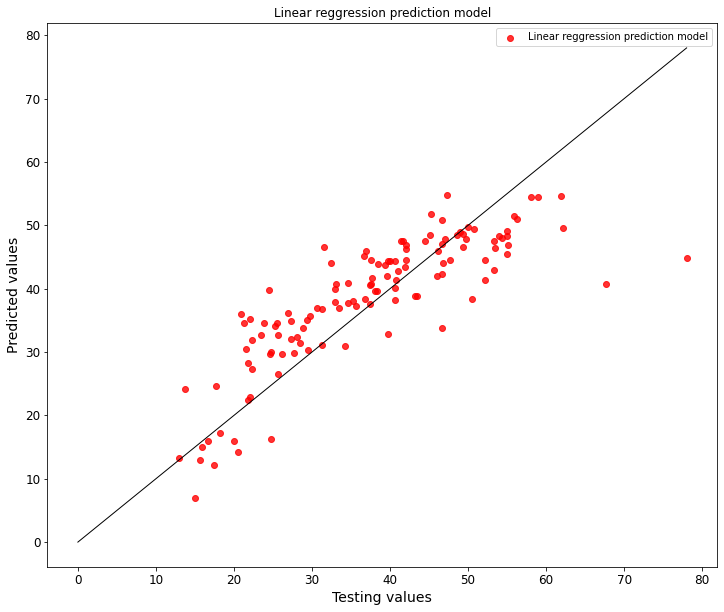

In [13]:
plot("Linear reggression prediction model", y_test, linear_y_pred)

# Lasso regression

In [14]:
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso()

lasso_alpha = np.logspace(-5, 1, 10)
lasso_coef = np.empty_like(lasso_alpha)
scores = np.empty_like(lasso_alpha)

for i,a in enumerate(lasso_alpha):
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    lasso_coef[i] = np.sum(lasso.coef_ != 0)
    scores[i] = lasso.score(X_test, y_test)

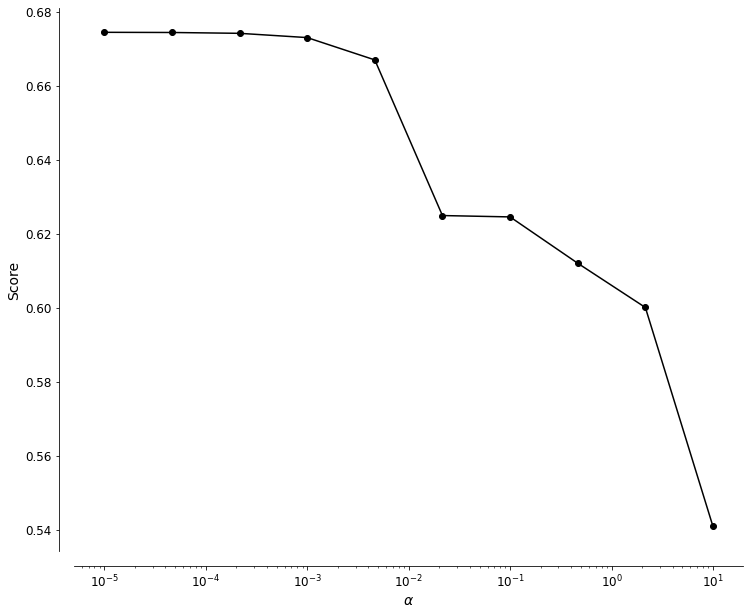

In [15]:
plt.plot(lasso_alpha, scores, '-ko')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

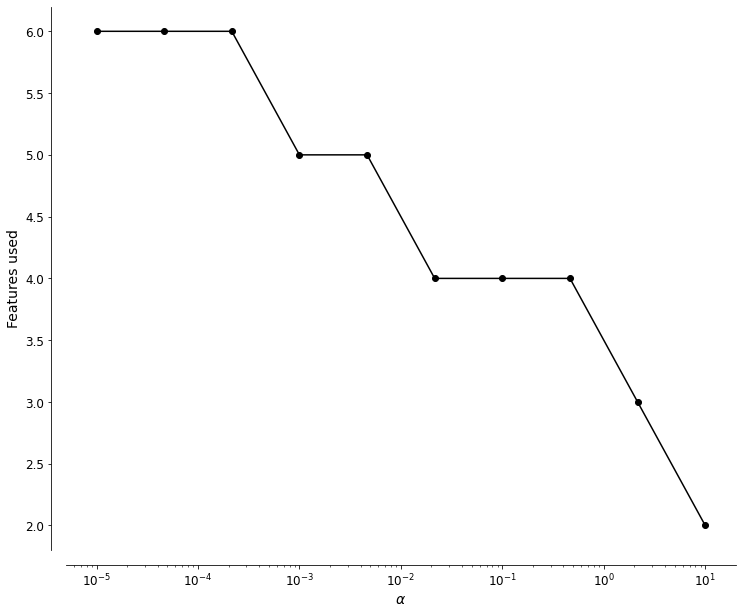

In [16]:
plt.plot(lasso_alpha, lasso_coef, '-ko')
plt.xlabel(r'$\alpha$')
plt.ylabel('Features used')
plt.xscale('log')
sns.despine(offset=15)

In [17]:
lasso.set_params(alpha=0.5)
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)
summarizeReggression(lasso, y_test, lasso_y_pred)

Mean squared error: 64.99
Coefficient of determination: 0.61
Number of features used:  3


In [18]:
lr_train_score = lasso.score(X_train,y_train)
lr_test_score = lasso.score(X_test,y_test)

print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

LR training score: 0.5142762409716479
LR test score:  0.6109770757853203


In [19]:
validate(lasso, X, y)

Mean MAE: 6.465 (0.762)


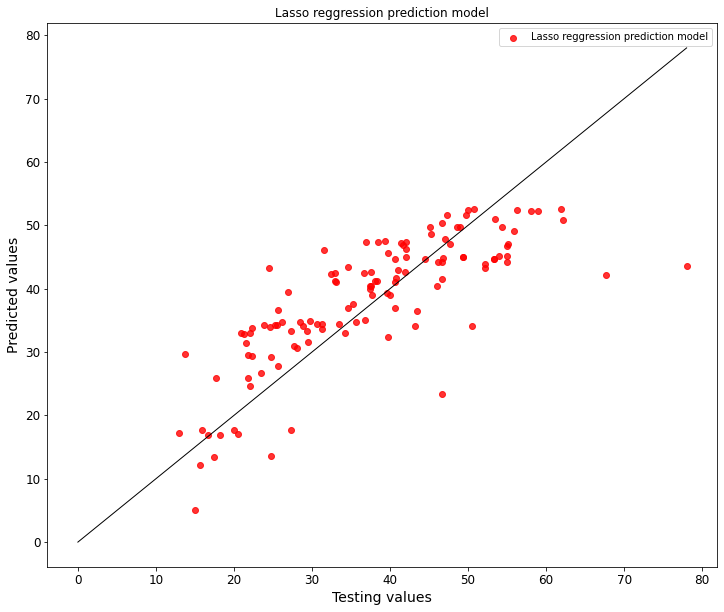

In [20]:
plot("Lasso reggression prediction model", y_test, lasso_y_pred)

# Ridge regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge = Ridge()

ridge_alpha = np.logspace(-5, 5, 10)
r2_scores = np.empty_like(ridge_alpha)
ridge_train_pred = []
ridge_test_pred = []

for i,a in enumerate(ridge_alpha):
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_test_prediction = ridge.predict(X_test)
    scores[i] = r2_score(y_test, ridge_test_prediction)
    ridge_train_pred.append(ridge.predict(X_train))
    ridge_test_pred.append(ridge_test_prediction)

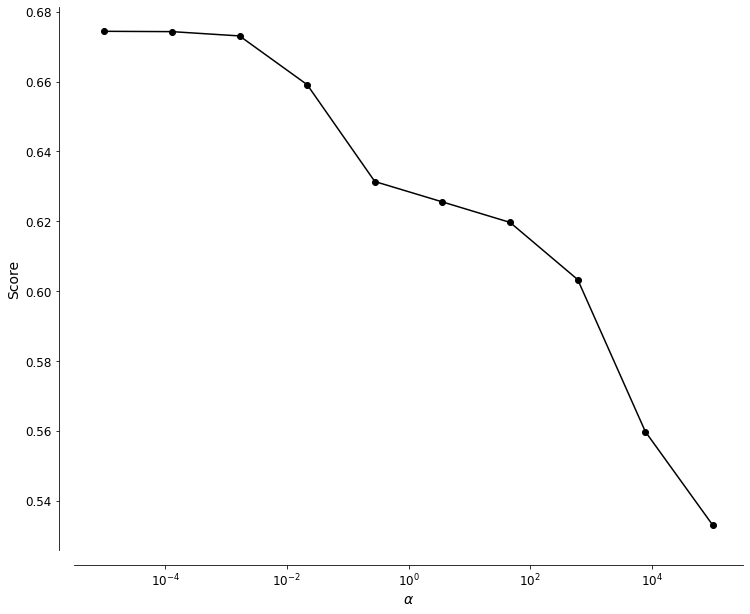

In [32]:
plt.plot(ridge_alpha, scores, '-ko')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

Text(0, 0.5, 'MSE')

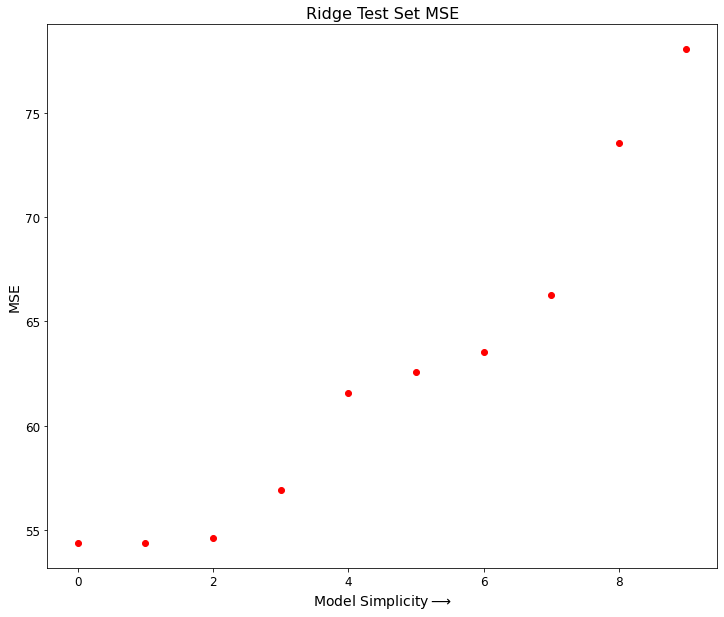

In [25]:
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
plt.plot(ridge_mse_test[:25], 'ro')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")

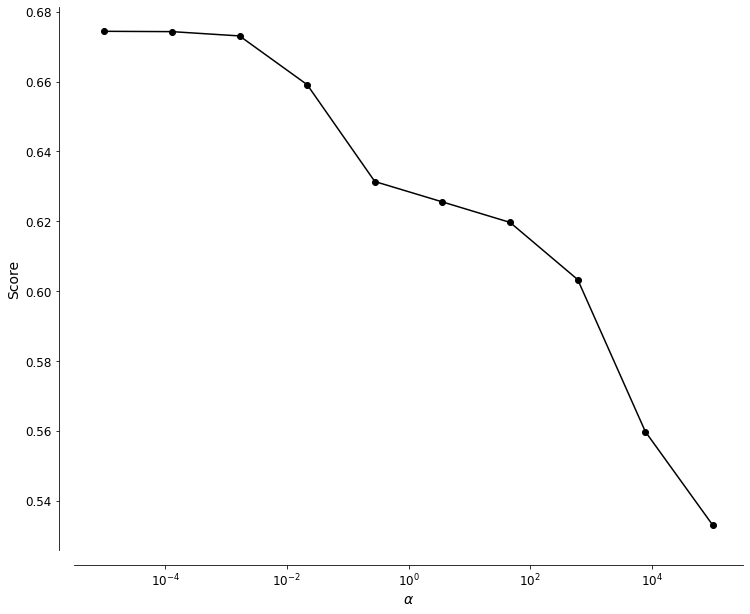

In [28]:
plt.plot(ridge_alpha, r2_scores, '-ko')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [26]:
validate(ridge, X, y)

Mean MAE: 7.035 (0.797)


Mean squared error: 62.48
Coefficient of determination: 0.63
Number of features used:  6


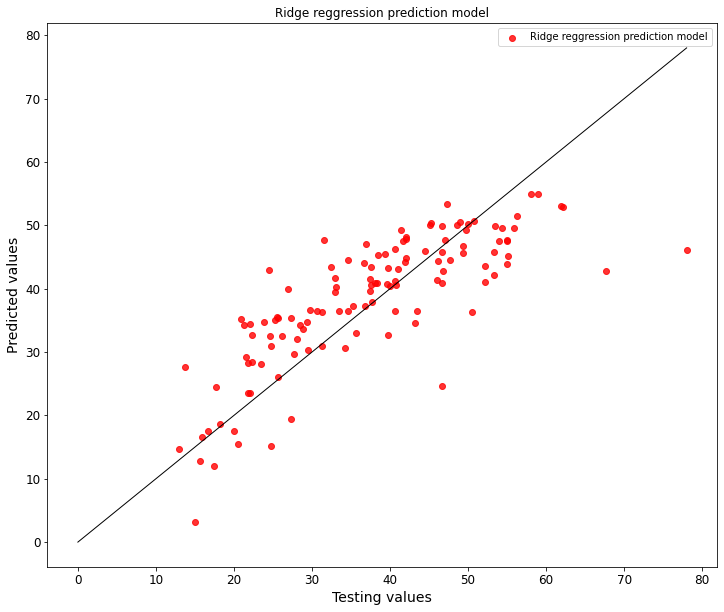

In [27]:
ridge.set_params(alpha=2)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)
summarizeReggression(ridge, y_test, ridge_y_pred)

plot("Ridge reggression prediction model", y_test, ridge_y_pred)